# Hello Titanic

Working through the Titanic competition by loosely following along with a [tutorial](https://www.kaggle.com/sashr07/kaggle-titanic-tutorial).

In [1]:
import matplotlib.pyplot
import pandas
import sklearn.linear_model
import sklearn.model_selection

In [2]:
train = pandas.read_csv('train.csv')
test = pandas.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
sex_pivot = train.pivot_table(index='Sex', values='Survived')

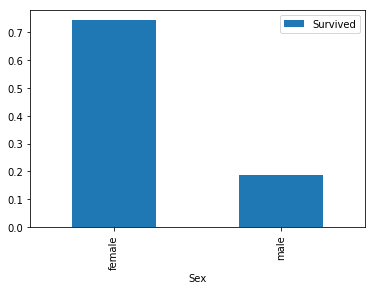

In [5]:
sex_pivot.plot.bar()

In [6]:
pclass_pivot = train.pivot_table(index='Pclass', values='Survived')

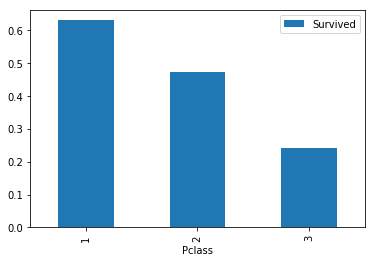

In [7]:
pclass_pivot.plot.bar()

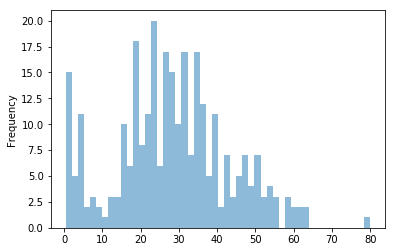

In [8]:
train[train['Survived'] == 1]['Age'].plot.hist(alpha=.5, bins=50)

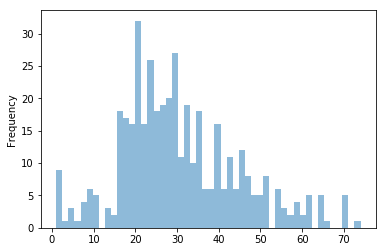

In [9]:
train[train['Survived'] == 0]['Age'].plot.hist(alpha=.5, bins=50)

In [10]:
median_age = train['Age'].median()

train['Age'] = train['Age'].fillna(median_age)
test['Age'] = test['Age'].fillna(median_age)

In [11]:
def engineerFeatures(df):
    df['AgeSquared'] = df.apply(lambda row: row['Age'] ** 2, axis=1)
    df['Child'] = df.apply(lambda row: 1 if row['Age'] < 18 else 0, axis=1)
    df['Male'] = df.apply(lambda row: 1 if row['Sex'] == 'male' else 0, axis=1)
    
    return pandas.concat([df, pandas.get_dummies(df['Pclass'], prefix='Pclass')], axis=1)

train = engineerFeatures(train)
test = engineerFeatures(test)

In [12]:
regression = sklearn.linear_model.LogisticRegression(max_iter=5000, solver='lbfgs')

In [13]:
sklearn.model_selection.cross_validate(regression, train[['Age', 'AgeSquared', 'Child', 'Male', 'Pclass_2', 'Pclass_3', 'SibSp', 'Parch']], train['Survived'], cv=10, return_train_score=True)

{'fit_time': array([0.08720636, 0.0618124 , 0.10482097, 0.05316615, 0.07009268,
        0.0680418 , 0.087924  , 0.1072495 , 0.07206035, 0.02389455]),
 'score_time': array([0.00057125, 0.00055242, 0.00057316, 0.000561  , 0.0005548 ,
        0.00064874, 0.00055242, 0.00065255, 0.00056791, 0.00056386]),
 'test_score': array([0.82222222, 0.77777778, 0.78651685, 0.80898876, 0.83146067,
        0.78651685, 0.7752809 , 0.7752809 , 0.85393258, 0.79545455]),
 'train_score': array([0.81148564, 0.81772784, 0.82169576, 0.79052369, 0.81296758,
        0.81795511, 0.81546135, 0.81670823, 0.8117207 , 0.81195517])}

In [14]:
regression.fit(train[['Age', 'AgeSquared', 'Child', 'Male', 'Pclass_2', 'Pclass_3']], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
predictions = regression.predict(test[['Age', 'AgeSquared', 'Child', 'Male', 'Pclass_2', 'Pclass_3']])

In [16]:
submission = pandas.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})

In [17]:
submission.to_csv('submission.csv', index=False)